# CUNY MSDS DATA620 - Web Analytics

# Week 3 - Part 2 | Network Analysis - Davis Southern Club Women

## Team1 : Ramnivas Singh, Deepak Sharma, Tage Singh

### Description

Davis Southern Club Women dataset is used ths assignment for 2-node network analysis. These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

1.Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.
[For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].
Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2.Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat

3.Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math
import scipy as sp
from prettytable import PrettyTable
import networkx.algorithms.bipartite as bipartite

Load graph object of davis southern women data set.

In [2]:
G = nx.davis_southern_women_graph() # Returns Davis Southern women social network.
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


In [3]:
print(bipartite.is_bipartite(G))

True


Create two separate nodes from this data sets
a. Women,who attended the events
b. Events, attended by the women

In [4]:
# Separates the two sets of nodes into 'women' and the other 'clubs'
women = G.graph['top']
clubs = G.graph['bottom']

In [5]:
print(len(women))
print(women)

18
['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [6]:
print(len(clubs))
print(clubs)

14
['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


Generate adjacency list format from graph G

In [7]:
 for line in nx.generate_adjlist(G):
    print(line)

Evelyn Jefferson E1 E2 E3 E4 E5 E6 E8 E9
Laura Mandeville E1 E2 E3 E5 E6 E7 E8
Theresa Anderson E2 E3 E4 E5 E6 E7 E8 E9
Brenda Rogers E1 E3 E4 E5 E6 E7 E8
Charlotte McDowd E3 E4 E5 E7
Frances Anderson E3 E5 E6 E8
Eleanor Nye E5 E6 E7 E8
Pearl Oglethorpe E6 E8 E9
Ruth DeSand E5 E7 E8 E9
Verne Sanderson E7 E8 E9 E12
Myra Liddel E8 E9 E10 E12
Katherina Rogers E8 E9 E10 E12 E13 E14
Sylvia Avondale E7 E8 E9 E10 E12 E13 E14
Nora Fayette E6 E7 E9 E10 E11 E12 E13 E14
Helen Lloyd E7 E8 E10 E11 E12
Dorothy Murchison E8 E9
Olivia Carleton E9 E11
Flora Price E9 E11
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14


Draw aplot to show network relation between each node. Women and events are considered as separate nodes and used together in this plot.

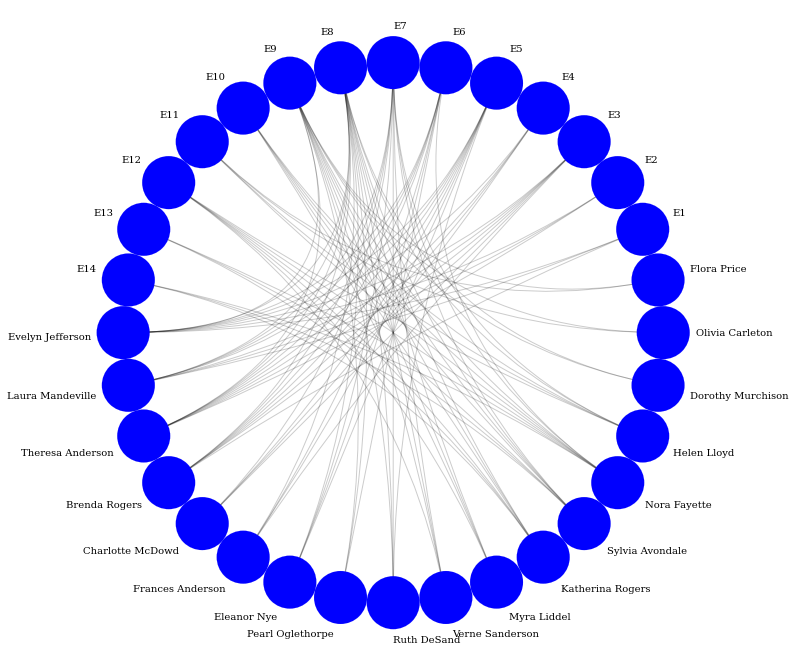

In [8]:
from nxviz.plots import CircosPlot
c = CircosPlot(G, figsize=(12, 12),node_labels=True)
c.draw()

Create a bipartite projected graph onto women nodes

In [9]:
# Bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


Project bipartite graph onto women nodes keeping number of co-occurence. The degree computed is weighted and counts the total number of shared contacts

In [10]:
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


Draw the bipartite graph of women and clubs nodes. This graph shows, how many social events (clubs) are attended by an indiviual women. Also this graph shows how many women attended a perticullr social event

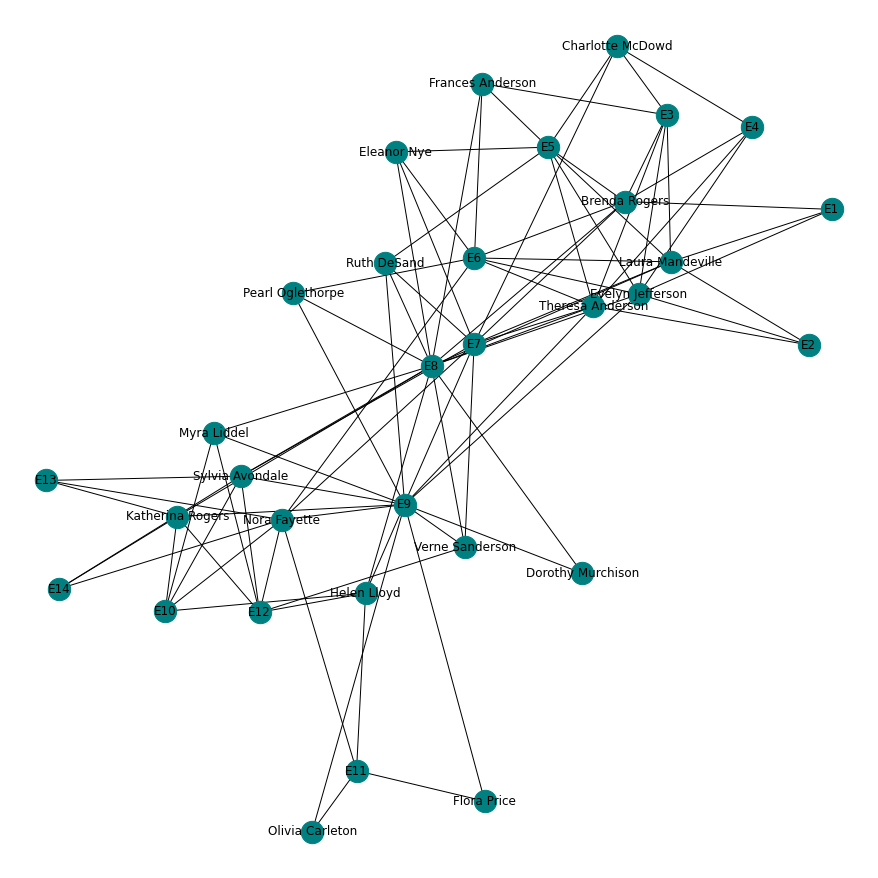

In [11]:
plt.figure(3,figsize=(12,12))
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), node_color='teal', with_labels=True, node_size = 500)
plt.show()

Generate weighted projection of G onto one of its node sets for social events.

In [12]:
clubs_wt_proj_graph = bipartite.weighted_projected_graph(G, clubs) 
print(nx.info(clubs_wt_proj_graph))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


Compute the clustering coefficient for social event nodes.

In [13]:
clubs_cluster= pd.DataFrame(zip(nx.clustering(clubs_wt_proj_graph).keys(), 
                                  nx.clustering(clubs_wt_proj_graph).values())).sort_values(by = [1], 
                                                                                            axis=0,ascending=True)
# Print Club Cluster
print(clubs_cluster)

      0         1
5    E6  0.679487
6    E7  0.679487
7    E8  0.679487
8    E9  0.679487
0    E1  1.000000
1    E2  1.000000
2    E3  1.000000
3    E4  1.000000
4    E5  1.000000
9   E10  1.000000
10  E11  1.000000
11  E12  1.000000
12  E13  1.000000
13  E14  1.000000


Generate weighted projection of G onto one of its node sets for women who attended the events.

In [14]:
women_wt_proj_graph  = bipartite.weighted_projected_graph(G, women)
print(nx.info(women_wt_proj_graph))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


Compute the clustering coefficient for women nodes.

In [15]:
women_cluster = pd.DataFrame(zip(nx.clustering(women_wt_proj_graph).keys(), 
                                  nx.clustering(women_wt_proj_graph).values())).sort_values(by = [1], 
                                                                                            axis=0, ascending=False)
# Print Women Cluster
print(women_cluster)

                    0         1
17        Flora Price  1.000000
16    Olivia Carleton  1.000000
4    Charlotte McDowd  1.000000
3       Brenda Rogers  0.961905
5    Frances Anderson  0.961905
6         Eleanor Nye  0.961905
1    Laura Mandeville  0.961905
7    Pearl Oglethorpe  0.933333
15  Dorothy Murchison  0.933333
10        Myra Liddel  0.933333
11   Katherina Rogers  0.933333
13       Nora Fayette  0.897059
14        Helen Lloyd  0.897059
0    Evelyn Jefferson  0.897059
12    Sylvia Avondale  0.897059
8         Ruth DeSand  0.897059
2    Theresa Anderson  0.897059
9     Verne Sanderson  0.897059


Draw the weighted projected network graph of club nodes.

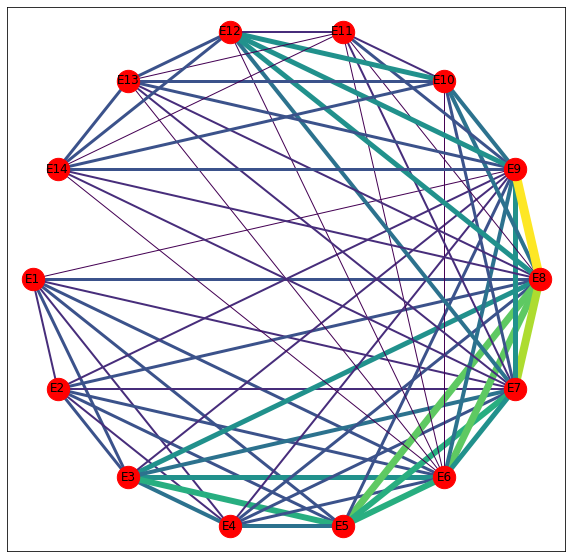

In [16]:
plt.figure(figsize=(10,10))
club_network = bipartite.weighted_projected_graph(G, clubs, ratio=False)
weights = [edata['weight'] for f,t,edata in club_network.edges(data=True)]
clubplot = nx.draw_networkx(club_network,pos=nx.shell_layout(club_network), 
                            width=weights, node_color ='red',edge_color=weights, node_size=500)

Generate project bipartite graph onto women nodes

In [17]:
women_projected_graph = bipartite.projected_graph(G, women)
women_cluster  = pd.DataFrame(list(women_projected_graph.degree()),
                              columns=["Member","#Friends"]).sort_values('#Friends', ascending=False)
print(women_cluster)

               Member  #Friends
0    Evelyn Jefferson        17
8         Ruth DeSand        17
14        Helen Lloyd        17
13       Nora Fayette        17
12    Sylvia Avondale        17
9     Verne Sanderson        17
2    Theresa Anderson        17
7    Pearl Oglethorpe        16
10        Myra Liddel        16
11   Katherina Rogers        16
15  Dorothy Murchison        16
6         Eleanor Nye        15
5    Frances Anderson        15
1    Laura Mandeville        15
3       Brenda Rogers        15
16    Olivia Carleton        12
17        Flora Price        12
4    Charlotte McDowd        11


Draw weighted projected network graph of women nodes.

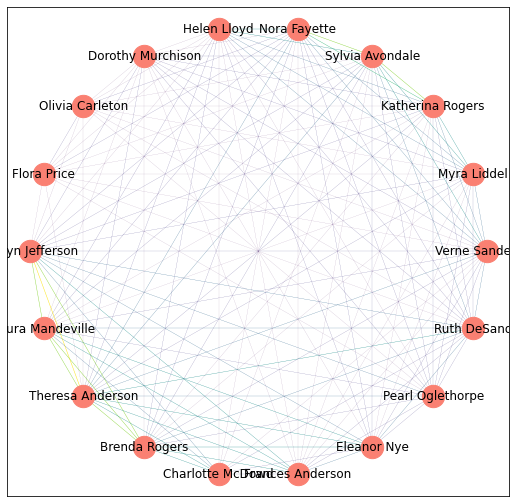

In [18]:
plt.figure(figsize=(9,9))
women_network = bipartite.weighted_projected_graph(G, women, ratio=True)
weights = [edata['weight'] for f,t,edata in women_network.edges(data=True)]
women_plot = nx.draw_networkx(women_network,pos=nx.shell_layout(women_network),
                              width=weights, node_color ='salmon',edge_color=weights, node_size=500)

Function to search each node in the graph for a given width

In [19]:
def progressive_widening_search(G, source, value, condition, initial_width=1):
    if condition(source):
        return source
    log_m = math.ceil(math.log2(len(G)))
    for i in range(log_m):
        width = initial_width * pow(2, i)
        for u, v in nx.bfs_beam_edges(G, source, value, width):
            if condition(v):
                return v
    raise nx.NodeNotFound("no node satisfied the termination condition")

Lets generate Centrality for Graph G

Found node 66 with centrality 0.12664400266150413


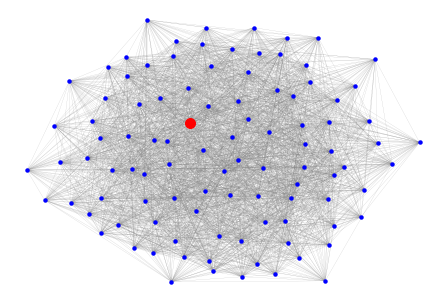

In [20]:
G = nx.gnp_random_graph(100, 0.5)
centrality = nx.eigenvector_centrality(G)
avg_centrality = sum(centrality.values()) / len(G)

def has_high_centrality(v):
    return centrality[v] >= avg_centrality
source = 0
value = centrality.get
condition = has_high_centrality

found_node = progressive_widening_search(G, source, value, condition)
c = centrality[found_node]
print(f"Found node {found_node} with centrality {c}")

# Draw graph
pos = nx.spring_layout(G)
options = {
    "node_color": "blue",
    "node_size": 20,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(G, pos, **options)
# Draw node with high centrality as large and red
nx.draw_networkx_nodes(G, pos, nodelist=[found_node], node_size=100, node_color="r")
plt.show()

Function to generate the table for a given graph (women nodes or club nodes). This table displays Degree, Degree Centrality, Betweenness, Closeness, Eigenvector for provided grap objects

In [21]:
def PrintTable(graph):
   degree = nx.degree(graph)
   degree_centrality = nx.degree_centrality(graph)
   betweenness_centrality = nx.betweenness_centrality(graph)
   closeness_centrality = nx.closeness_centrality(graph)
   eigenvector_centrality = nx.eigenvector_centrality_numpy(graph)   
   table = [[name,degree[name], round(degree_centrality[name],3), round(betweenness_centrality[name],3),
             round(closeness_centrality[name],3), round(eigenvector_centrality[name],3)] for name in graph.nodes()]
   table = sorted(table,key = lambda x: -x[2])
   printTable = PrettyTable(['Subject','Degree','Degree Centrality','Betweenness','Closeness','Eigenvector'])
   for i in range(0, len(table)):
       printTable.add_row(table[i])
   return printTable

Draw a weighted projected network graph of women nodes along with the weight as weighted factor

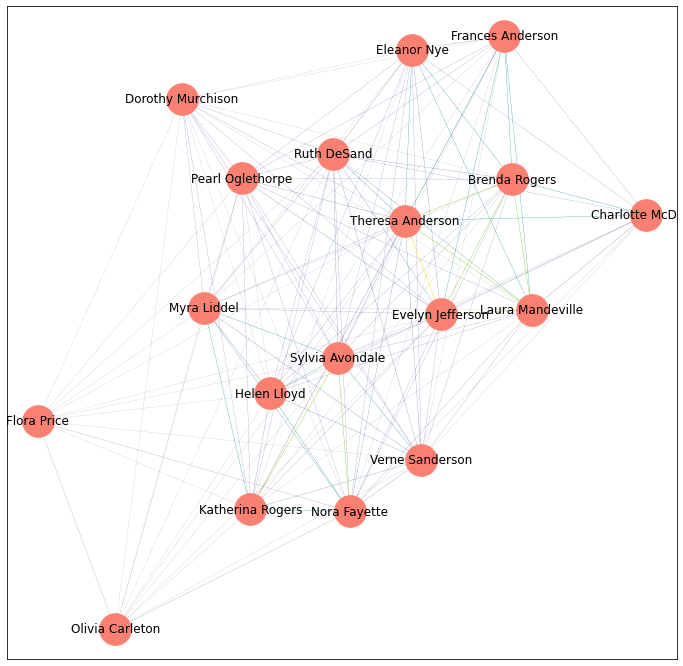

In [22]:
weights = [edata['weight'] for f,t,edata in women_network.edges(data=True)]
plt.figure(figsize = (12,12))
nx.draw_networkx(women_network, width=weights, node_color ='salmon',edge_color=weights, node_size=1000)

Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for women nodes

In [23]:
print((PrintTable(women_wt_proj_graph)))

+-------------------+--------+-------------------+-------------+-----------+-------------+
|      Subject      | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+-------------------+--------+-------------------+-------------+-----------+-------------+
|  Evelyn Jefferson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Theresa Anderson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Ruth DeSand    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Verne Sanderson  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Sylvia Avondale  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Nora Fayette   |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Helen Lloyd    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Pearl Oglethorpe |   16   |       0.941       |    0.005    |   0.944   |    0.243    |

Draw a weighted projected network graph of social event nodes along with the weight as weighted factor

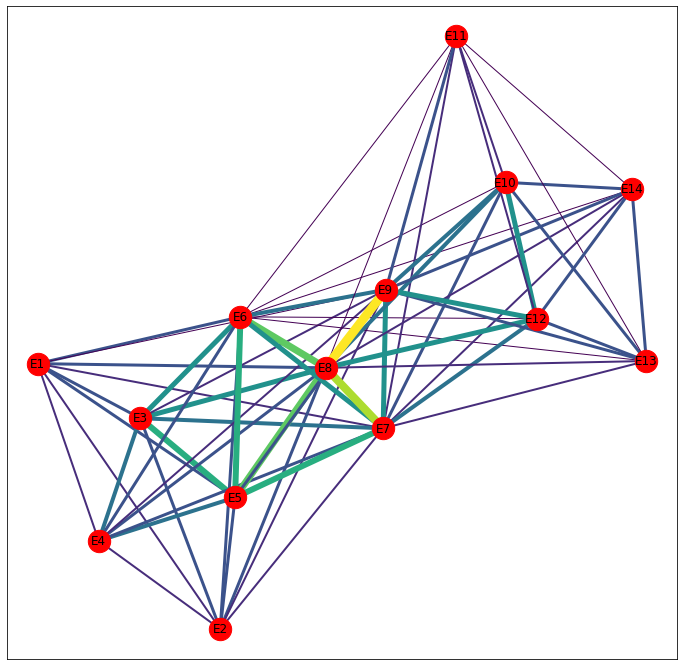

In [24]:
weights = [edata['weight'] for f,t,edata in club_network.edges(data=True)]
plt.figure(figsize = (12,12))
nx.draw_networkx(club_network, width=weights, node_color ='red',edge_color=weights, node_size=500)

Create table with degree, degree centrality, closeness centrality, betweenness centrality and eigenvecture centrality for social event nodes

In [25]:
print((PrintTable(clubs_wt_proj_graph)))

+---------+--------+-------------------+-------------+-----------+-------------+
| Subject | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+---------+--------+-------------------+-------------+-----------+-------------+
|    E6   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E7   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E8   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E9   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E1   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E2   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E3   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E4   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E5   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|   E10   |   8    |       0

#### Conclusions

By looking at the adjancency matrix, we found various patterns. looking at each member and how many friends they have versus how many meetings they attend that have friends. Events E7, E8, E9 have very large attendance when compared to the others. There’s a few strong sub networks between (Laura, Brenda, Theresa, Evelyn) and (Sylvia, Helen, Katherine, Nora). We found this graph a well connected closed network with high degree of variation on social events and women nodes.


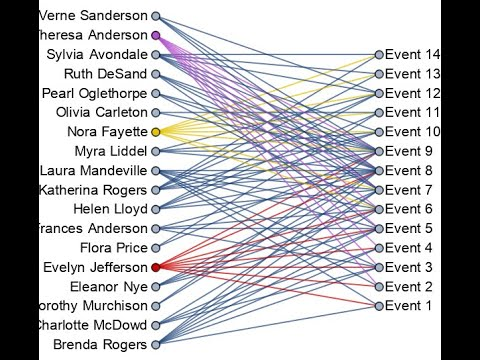

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo('h9mojGTCpGI')

#### References
Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.

Davis, A et al. (1941). Deep South. Chicago: University of Chicago Pre

Robert A. Hanneman (Department of Sociology, University of California, Riverside) Social network data